In [1]:
import pandas as pd 
import seaborn as sns 
import os 
import numpy as np 

I use data pulled from [this](https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv) dataset to do some simple visualizations to populate this repo. 

In [2]:
df = pd.read_table('https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv',sep=',')

In [ ]:
df.head()

In [8]:
# wanting to see what airlines have '*' included in their names  
df.airline.unique()

array(['Aer Lingus', 'Aeroflot*', 'Aerolineas Argentinas', 'Aeromexico*',
       'Air Canada', 'Air France', 'Air India*', 'Air New Zealand*',
       'Alaska Airlines*', 'Alitalia', 'All Nippon Airways', 'American*',
       'Austrian Airlines', 'Avianca', 'British Airways*',
       'Cathay Pacific*', 'China Airlines', 'Condor', 'COPA',
       'Delta / Northwest*', 'Egyptair', 'El Al', 'Ethiopian Airlines',
       'Finnair', 'Garuda Indonesia', 'Gulf Air', 'Hawaiian Airlines',
       'Iberia', 'Japan Airlines', 'Kenya Airways', 'KLM*', 'Korean Air',
       'LAN Airlines', 'Lufthansa*', 'Malaysia Airlines',
       'Pakistan International', 'Philippine Airlines', 'Qantas*',
       'Royal Air Maroc', 'SAS*', 'Saudi Arabian', 'Singapore Airlines',
       'South African', 'Southwest Airlines', 'Sri Lankan / AirLanka',
       'SWISS*', 'TACA', 'TAM', 'TAP - Air Portugal', 'Thai Airways',
       'Turkish Airlines', 'United / Continental*',
       'US Airways / America West*', 'Vietnam Airlines

In [3]:
df.dtypes.value_counts()

int64     7
object    1
dtype: int64

In [5]:
# unique values of object 
df.select_dtypes('object').apply(lambda x: pd.Series.nunique(x))

airline    56
dtype: int64

In [6]:
# unique values of int types 
df.select_dtypes('int64').apply(lambda x: pd.Series.nunique(x))

avail_seat_km_per_week    56
incidents_85_99           19
fatal_accidents_85_99     11
fatalities_85_99          38
incidents_00_14           14
fatal_accidents_00_14      4
fatalities_00_14          23
dtype: int64

In [7]:
# check for missing values 
def missing_vals_table(my_df):
    if my_df.isnull().sum().sum() > 0:
        miss_val = my_df.isnull().sum()
        miss_val_pct = 100 * miss_val / len(my_df)
        table = pd.concat([miss_val, miss_val_pct], axis=1)
        table = table[table.loc[:, table.columns[0]] != 0].sort_values(table.columns[0],
                                                                      ascending=False).round(3)
        table = table.rename(columns = {0: "missing values", 1: "% of Missing Values"})
        return table 
    else:
        return "there are no missing values"
missing_vals_table(df)

'there are no missing values'

In [17]:
df.fatal_accidents_00_14.max()

3

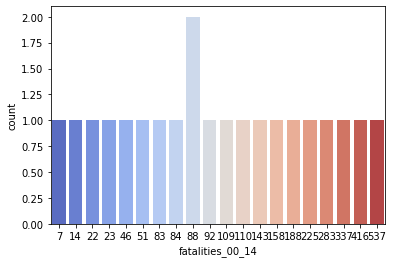

In [22]:
# find where incidents is greater than 4 
sns.countplot(df.loc[df.fatalities_00_14 > 4, 'fatalities_00_14'], palette = 'coolwarm')

In [ ]:
 sns.countplot(df['fatalities_00_14'], palette = 'coolwarm')


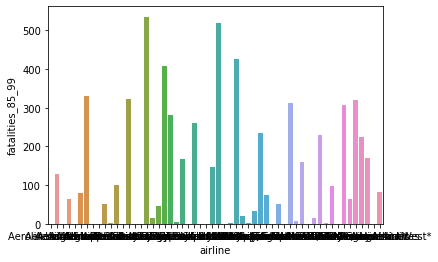

In [26]:
# barplot of fatalities by airline for 85-99 - only pull off top values for this viz 
sns.barplot(df.airline,df.fatalities_85_99)

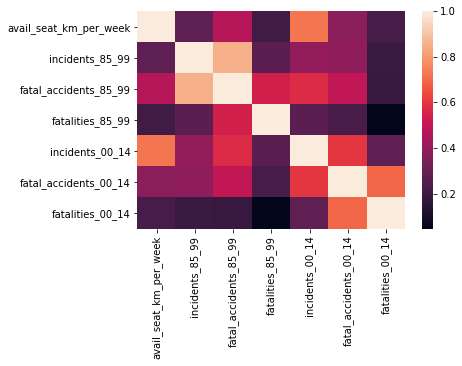

In [15]:
# correlation heatmap
sns.heatmap(df.corr(method='pearson'))

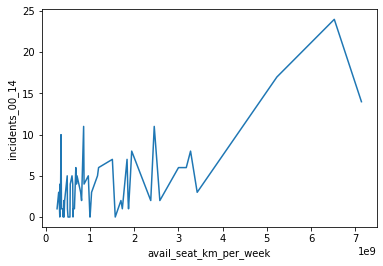

In [11]:
# line plot of incidents for 00-14 and available seats per week
sns.lineplot(df.avail_seat_km_per_week, df.incidents_00_14)